# Lecture 4, Data science in Neuroscience


## Plan for today

1. Review of last week's exercises: Reconstructing our mean waveforms
2. Overview of the next weeks
3. Data analysis project 1
4. Introduction to machine learning
5. Quizz on machine learning
6. Speed cell: a simple example of machine learning with a linear regression

***

## Review of last week's exercises

see `lecture_03.ipynb`

***


## Data analysis project 1

In the last step of the spike extraction procedure, we applied a K-means clustering algorithm to our spike waveform. Was this the best choice for this problem?

In a jupyter notebook, compare k-means clustering with at least 3 other clustering techniques available in [Scikit-learn](https://scikit-learn.org/stable/modules/clustering.html#clustering). 

For each of 4 clustering technique (including k-means):
1. Describe briefly how the algorhithm works
2. List a few advantages and disadvantages of the technique
3. Apply the techniques to your waveforms
4. Display the results

As a conclusion, and based on what you learned, choose which technique you think is the best for clustering our spike waveforms. Describe in a few reasons why you chose this algorighm.



***
## Overview of the next weeks

1. Machine learning introduction (25.11.2021)
2. Behavioral tracking with a deep neural network (Deeplabcut) (02.12.2021)
3. Behavioral correlates of firing activity (place cells and grid cells) (09.12.2021)
4. Statistical testing (16.12.2021)
4. Presentation of data analysis project (16.01.2022)


***
## Introduction to machine learning

What is machine learning?


**Machine learning is the field of study that gives computers the ability to learn without being explicitly programmed.**

**The computer learns from input data to achieve a specific objective.**

Examples: 

* A program learns to identify the nose, ears and tail of a mouse in images (complex model). 
* A program learns the linear relationship between the firing rate of a neuron and the running speed of an animal (simple model).


## Why should you care about machine learning as a Neuroscientist?


Machine learning is behind many modern tools used by neuroscients.

* [Track behavior](https://www.nature.com/articles/s41593-018-0209-y)
* [Image segmentation (e.g., cell counting)](https://www.nature.com/articles/s41592-018-0261-2)
* [Spike extraction and clustering](https://www.biorxiv.org/content/10.1101/061481v1)

They make new experiments possible. They can discover patterns in your data.

These are state-of-the-art software in their respective field.

## Objective during this course

* Understand what machine learning is.
* Get faminiar with the terminology
* Experiment with a few examples
* Try to go from math formulas to python code

## Definition of machine learning

* Input: $X$ (single number or an array)
* Output: $Y$ (single number or an array)
* Unknown function or model: $f()$
* Random error: $\epsilon$

$Y = f(X) + \epsilon $

Machine learning refers to a set of approaches for estimating the best parameters in $f()$

$f()$ can be the the equation for a line or a deep neural network with millions of parameters.

***
## What is learning?

Learning can be defined as finding the best model parameters to solve a problem.

**Simple example**: Find the relationship between IQ and education with a linear regression model. Two parameters ($a$ and $b$).

$y = a*x + b $

**Complex example**: Find a mouse in an image. Millions of parameters.


<div>
<img src="../images/deep-neural-network.png" width="500"/>
</div>



## A typical training loop

1. Initialize the model with random parameters
2. Feed data with labels to your model
3. Calculate the error of your model (using a loss function).
4. Adjust the model parameters by a small amount to reduce the error.
5. Go back to 2.

This training loop is very common in machine learning.

***
# Terminology in machine learning

## Prediction versus inference

Why do we want to estimate $f$?


### Prediction

* We focus on predicting $Y$.
* $f$ is treated as a black box

### Inference

* **Understand** a phenomena by modelling it.
* Which predictors are associated with the response?
* Is the relation between $Y$ and each predictor adequately summarized using a linear equation?


***
## Supervised versus unsupervised

### Supervised
* The training set contains labeled data.
* For each observation of the predictors $X_{i}, i = 1,...,n$ there is a known response measurement $y_{i}$.
* Example: linear regression

### Unsupervised
* Uncovering hidden patterns from unlabeled data.
* For each observation $i = 1,...,n$, we observed a vector of measurements $X_{i}$, but no response $y_{i}$.
* Examples: PCA and k-means clustering used in lecture 3.


***
## Regression versus classification

### Regression

* $Y$ is a continuous variable
* Examples: Numbers from 0 to 100

### Classification

* $Y$ is a categorical variable
* Examples: Classify cats and dogs, 
* Different types of neurons (pyramidal cells vs interneurons)


***
## Training and test sets

### Training set

* The observations (data points) that we use to estimate $f$ (to train our model). 

### Test set

* Observations used to test how accurate our model is. The model has never "seen" this data because they are not used during training!

* The test set is very important when using complex models with many parameters. Complex models can learn to perform great on your training set but may generalize very poorly to new data. This is called **overfitting**. You can assess whether your model is overfitting using a test set.


***
## Time for a quizz!

[Quizz ink](https://forms.gle/uYvtpkNYX7foZFUZ6)

or

https://forms.gle/uYvtpkNYX7foZFUZ6


You have 7 minutes to complete the questions.


***
# Using machine learning to characterize a speed cell.

**Speed cell**: Neuron that increases its firing rate when the animal runs at higher speed. These neurons have been observed in several brain areas, including the medial entorhinal cortex, hippocampus, and visual cortex.

[Speed cells in the medial entorhinal cortex (2015) Nature](https://www.nature.com/articles/nature14622)


<div>
<img src="../images/speed_kropff.png" width="1000"/>
</div>



## Our task

Write and **train a linear model** that will describe how the firing rate of a neuron is related to the running speed of a mouse.

Because we want to understand how machine learning works under the hood, we will do all the steps without using external libraries like scipy, scikit-learn or pytorch.



## A simulated speed cell

To know if our modeling approach is working, it is useful to start with simulated data. The main advantage is that we know the exact parameters that were used when generating the data. If your approach works, it should find the same parameters.

* When coding, it is usually a good idea to start with simulated data. Some problems will be easier to fix. You can easily manipulated/change simulated data and assess the effect on your model.
* Try to make your simulated data as similar as the real data with which you plan to use the model.


#### Position data from a real experiment

We can load position tracking data from a real experiment with a mouse. The file contains the position of the animal as a function of time. 

The animal was exploring an arena with a diameter of 80 cm.

The duration of the recording is 10 minutes.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
fn="../data/animal_path.npy"
path = np.load(fn)
# get some information about the data just loaded
print(type(path), path.ndim, path.shape)

<class 'numpy.ndarray'> 2 (30000, 3)


This is a NumPy array with 2 dimensions. It contains 30000 rows and 3 columns. 

The columns are :

* column 0: time in seconds
* column 1: x position in cm
* column 2: y positiony in cm

To work with meaningful variable names, we will save the data in `time`, `x` and `y`

In [28]:
time = path[:,0]
x = path[:,1]
y = path[:,2]

Have a look at the data to ensure they were loaded correctly.

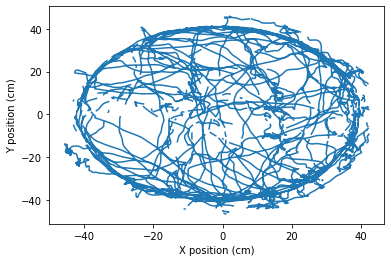

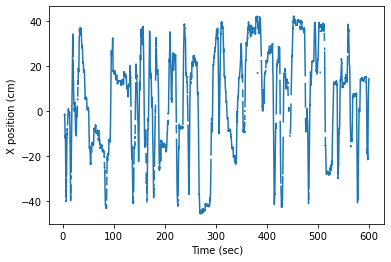

In [30]:
plt.plot(x,y)
plt.xlabel("X position (cm)")
plt.ylabel("Y position (cm)")
plt.show()
plt.plot(time,x)
plt.xlabel("Time (sec)")
plt.ylabel("X position (cm)")
plt.show()

#### Calculate running speed
We need to calculate the speed of the animal from the position data.

A google search reveals that speed is distance/time. 

You find that distance: $D= \sqrt{(x1-x0)^2 + (y1-y0)^2}$

How would you calculate the distance from the position data?

Calculate the difference in successive data points in your arrays.

In [16]:
xd = np.diff(x,append=np.nan)
yd = np.diff(y,append=np.nan)
td = np.diff(time,append=np.nan)

In [17]:
D = np.sqrt(xd**2 + yd**2) # calculate the distance run at each position tracked

In [18]:
speed = D/td # get speed from distance

Speed: $D/t$, where $t$ is the time elapsed between time 0 and time 1.

In [20]:
# we can remove the np.nan values for our simulation
valid_indices = ~np.isnan(speed)
speed = speed[valid_indices]
time = time[valid_indices]

Always inspect your data with a few plots

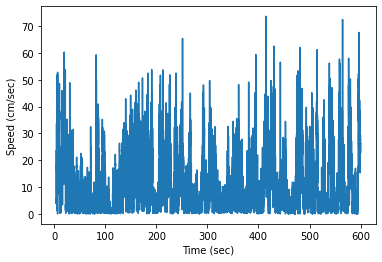

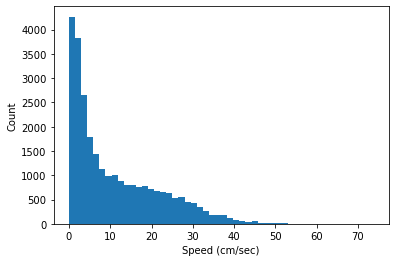

In [22]:
plt.plot(time,speed)
plt.xlabel("Time (sec)")
plt.ylabel("Speed (cm/sec)")
plt.show()
plt.hist(speed,bins=50)
plt.xlabel("Speed (cm/sec)")
plt.ylabel("Count")
plt.show()

The animal is running between 0 and 40 cm/sec most of the time. This seems reasonable. 

#### Model the firing rate of a neuron 

We will assume that the firing rate of our neuron is linearly related to the running speed of the animal.

$rate = speed*w + b + error$


In [103]:
w = 1.25 # parameter 2
b = 10 # parameter 1

Text(0, 0.5, 'Rate (Hz)')

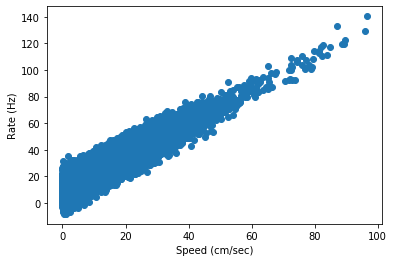

In [104]:
rate = speed*w + b + np.random.normal(loc=0.0, scale=5, size = speed.shape[0])
plt.scatter(speed,rate)
plt.xlabel("Speed (cm/sec)")
plt.ylabel("Rate (Hz)")

### Our task:

Write a learning loop to find the best parameters for the linear regression model $Y = f(X)$, where $X$ is the running speed and $Y$ is the firing rate.

For a linear regression, the model is $Y = Xw + b$

In machine learning lingo, $w$ is the weight and $b$ is the bias.

What are the parameters $w$ and $b$ that best predict the firing rate of the neuron? We know already... but can we recover them from the data?

## Possible ways to solve this problem

Our problem is a **linear regression** because the output is simply a weighted sum of the inputs plus a constant called the bias term (or intercept). In this case we have only one input.

There are many ways to find the best parameters:

* Closed-form equation
* Training loop using Gradient Descent

Normally, I would use `scipy.stats.linregress` or `sklearn.linear_model.LinearRegression`, but we want to understand how computers learn.


## Our linear regression model


In our simple case, this is the model:

$\hat{y} = \theta_0 + \theta_1 * x_1$

but we could have several inputs and the model would be

$\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \dots + \theta_{n}x_{n}$, where

* $\hat{y}$ is the predicted value
* $n$ is the number of features (in or case 1)
* $x_{i}$ is the $i$th feature value
* $\theta_{j}$ is the $j$th model parameter
* $\theta_{0}$ is our intercept or bias

We can write the same equation using vectors.

$\hat{y} = \mathbf{\theta} \cdot x$, where

* $\hat{y}$ is our model prediction.
* $\theta$ is the models parameter vector, containing the bias term $\theta_{0}$ and the feature weight $\theta_{1}$
* $x$ is the feature vector containing the inputs to the model. $x_{0}$ is always equal to 1
* $\theta \cdot x$ is the dot product of the two vectors. For our model, this is equal to $\theta_{0}x_{0}+\theta_{1}x_{1}$

In [230]:
x = np.array([[1,10]]) # speed of 10 cm per sec
theta = np.array([20,2]) # random guess of the 2 model parameters
print("x shape:",x.shape)
print("theta shape:",theta.shape)

x shape: (1, 2)
theta shape: (2,)


We can calculate the dot product of numpy arrays with `@`

In [231]:
x@theta

array([40])

Which is the same as

In [232]:
x[0,0]*theta[0]+x[0,1]*theta[1]

40

`x@theta` is much easier when we have more than 2 parameters in our model.

If we have all our data points as input in x.

In [233]:
X = np.c_[np.ones((speed.shape[0],1)),speed] # make a 2 column array with ones in the first column and speed in the second
print(X)
print(X.shape)

[[ 1.         16.56109922]
 [ 1.         18.39592726]
 [ 1.         14.97058294]
 ...
 [ 1.         15.30008556]
 [ 1.         11.48273852]
 [ 1.          9.03215574]]
(79062, 2)


In [234]:
yhat = X@theta # prediction of the model
yhat.shape

(79062,)

## Measuring the model performance

To be able to train any model, you need a measure of how bad it is doing it is doing. This is usually refer to as a `cost function`.

For linear regression model, the mean squared error (MSE) is often used. 


$MSE = \frac{1}{m} \sum_{i = 1}^{m}(\hat{y}^{i} - y^{i})^2$, where

* $m$ is the number of data points
* $y$ is the measured dependent variable (firing rate of the neuron) 
* $\hat{y}$ is the prediction of the model


In [235]:
mse = np.mean((rate-yhat)**2)
# alternatively
mse = np.mean((rate-X@theta)**2)
print("MSE:",mse)

MSE: 431.59398613158004


The task of training loop (machine learning) in this exercise is to modify the model parameters to reduce the MSE to the smallest value possible.

## Training procedure using gradient descent

We want to tweak the parameters with the goal of reducing the MSE. 

One way to do this is to use an optimization algorithm called **gradient descent**. 

Gradient descent is capable of finding optimal solutions to many type of problems/functions.


<div>
<img src="../images/gradient_descent.png" width="1000"/>
</div>


With gradient descent, we calculate what is the slope with the current parameter, then we change the parameter so that we move down the slope. 

We can have a look at the cost function as a function of different values of theta.

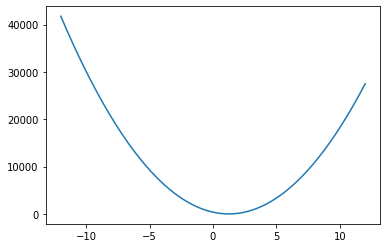

In [257]:
res = np.empty(200)
param_values = np.linspace(-12,12,200)
for i,t in enumerate(param_values):
    theta[1]=t # change the second parameter of the model
    res[i] = np.mean((rate-X@theta)**2)
plt.plot(param_values,res)
plt.show()

### Partial derivative of the cost function

$\nabla_{\theta}MSE(\theta) = \frac{2}{m} X^{T}(X\theta - y)$

In [324]:
theta = np.array([1,-2.25])
m=rate.shape[0]
gradients = 2/m*(X.T @ (X@theta - rate))

### Our first training loop

In [356]:
eta = 0.002 # learning rate
n_iterations = 6000 
m = rate.shape[0] # number of data points


theta = np.random.rand(2) # set random parameters as a starting point

# learning loop
for iteration in range(n_iterations):

    # calculate the gradients with the current parameters
    gradients = 2/m*(X.T @ (X@theta - rate))
    
    # adjust the parameter so that we reduce the MSE
    theta = theta - eta * gradients
print("optimized theta:",theta)

optimized theta: [10.00477393  1.25032391]


If your training loop is not working as you expect, plot the paramters and loss during learning.

One common problem is using a value for `eta` that is too large or too small.

optimized theta: [10.0047846   1.25032339]


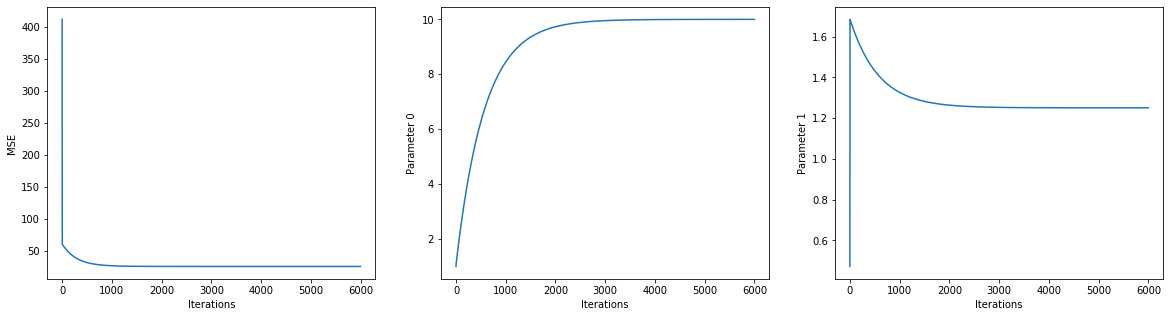

In [355]:
eta = 0.002
n_iterations = 6000
m = rate.shape[0]
theta = np.random.rand(2)

# arrays to store the results at each iteration
mse = np.empty(n_iterations)
tLearning = np.empty((n_iterations,2))


for iteration in range(n_iterations):
    gradients = 2/m*(X.T @ (X@theta - rate))
    
    # save results for the figure
    mse[iteration] = np.mean((rate-X@theta)**2)
    tLearning[iteration,:] = theta
    
    # change the parameters
    theta = theta - eta * gradients

print("optimized theta:",theta)

fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].plot(mse)
ax[0].set_ylabel("MSE")
ax[0].set_xlabel("Iterations")

ax[1].plot(tLearning[:,0])
ax[1].set_ylabel("Parameter 0")
ax[1].set_xlabel("Iterations")

ax[2].plot(tLearning[:,1])
ax[2].set_ylabel("Parameter 1")
ax[2].set_xlabel("Iterations")

plt.show()

## Can our currrent model to explain the firing rate of our speed cell?

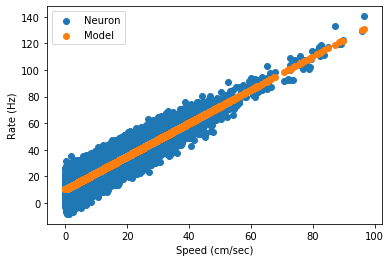

In [359]:
yhat = X@theta # predict the firing rate of the neuron using the optimize parameters

plt.scatter(speed,rate, label="Neuron")
plt.scatter(speed,yhat,label="Model")
plt.xlabel("Speed (cm/sec)")
plt.ylabel("Rate (Hz)")
plt.legend()
plt.show()

## Faster ways to find the best parameters

### The closed-form 

This is only possible with relatively simple functions.

In [360]:
best_parameters = np.linalg.inv(X.T@X) @ X.T @ rate
print(best_parameters)

[10.00502873  1.2503115 ]


### Scikit-Learn

In [178]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,rate)
lin_reg.intercept_,lin_reg.coef_

(10.005028733906624, array([0.       , 1.2503115]))